In [ ]:
 !pip3 install face_recognition
 !pip install Dlib
 !pip install opencv-python

     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=3e1f495c42ed926f78e17570d78f3154e2a2c07d79017acbfd82a55c32728352
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import dlib
import cv2
import sys
import os
import face_recognition
from google.colab.patches import cv2_imshow
from google.colab import files

sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/parwaaz-face/face-recognition')
from simple_facerec import SimpleFacerec

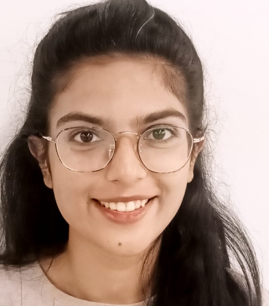

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/parwaaz-face/face-recognition/dataset/niha-pic.PNG")
cv2_imshow(img)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_encoding = face_recognition.face_encodings(rgb_img)[0]

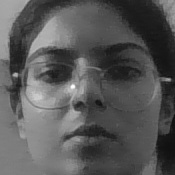

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/parwaaz-face/face-recognition/dataset/niha2.jpg")
cv2_imshow(img2)
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_encoding2 = face_recognition.face_encodings(rgb_img2)[0]

In [ ]:
result = face_recognition.compare_faces([img_encoding], img_encoding2)
print("Result: ", result)

Result:  [True]


## **Video capturing code**

In [ ]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode


def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      
      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});
    
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);

      video.srcObject = stream;
      video.muted = true;

      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);

      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):
  
  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

video_path = "video-test.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:video-test.mp4


In [ ]:
# Encode faces from a folder
sfr = SimpleFacerec()
sfr.load_encoding_images("/content/drive/MyDrive/Colab Notebooks/parwaaz-face/face-recognition/dataset")

# Load Camera
cap = cv2.VideoCapture("video-test.mp4")


while True:
    ret, frame = cap.read()

    # Detect Faces
    face_locations, face_names = sfr.detect_known_faces(frame)
    for face_loc, name in zip(face_locations, face_names):
        y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]

        cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 200), 2)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)

    cv2_imshow(frame)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.